# Advance Python Project- 2024W AML 2203 Advance Python Programming 

## Amazon review on the product of electronics 

### Description- This Dataset contains review on one language 'english' and it has been extracted from the market of 'US'

# <span style="color:blue">1)Loading the data set and removing the columns un-related to project </span>

In [1]:
!pip install nltk

DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/pandas_profiling-3.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/joblib-1.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/fonttools-4.50.0-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users

In [2]:
!pip install wordcloud

DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/pandas_profiling-3.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/joblib-1.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/fonttools-4.50.0-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users

In [3]:
# Necessary library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
from collections import Counter
from nltk import word_tokenize
from nltk import sent_tokenize
import sklearn
import spacy
import nltk
import wordcloud


nltk.download('wordnet')
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aravindadharmalingam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Version of the Libraray used in this project


In [4]:
print('The pandas version is: ',pd.__version__)
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The Numpy version is: ', np.__version__)
print('NLTK version: ', nltk.__version__)
print('Matplotlib version: ', matplotlib.__version__)
print('Wordcloud version: ', wordcloud.__version__)
print('Spacy version: ', spacy.__version__)

The pandas version is:  1.5.3
The scikit-learn version is 1.2.2.
The Numpy version is:  1.25.2
NLTK version:  3.8.1
Matplotlib version:  3.8.0
Wordcloud version:  1.9.3
Spacy version:  3.7.4


In [5]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products (1).csv')
viz_df = df.copy() # Visualization df only used for visualizing insights from all columns

df.head()

id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   
3  https://pisces.bbystatic.com/image2/BestBuy_US...   
4  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend...  ...   
1  allnewkindleereaderblack6glarefreetouchscreend...  ...   
2  allnewkindleereaderblack6glarefreetouchscreend...  ...   
3  allnewkindleereaderblack6glarefreetouchscreend...  ...   
4  allnewkindleereaderblack6glarefreetouchscreend...  ...   

                                    reviews.dateSeen reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...               False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                True   
2                               2018-05-27T00:00:00Z                True   
3                               2018-10-09T00:00:00Z                True   
4                               2018-05-27T00:00:00Z                True   

    reviews.id reviews.numHelpful reviews.rating  \
0          NaN                  0              3   
1          NaN                  0              5   
2          NaN                  0              4   
3  177283626.0                  3              5   
4          NaN                  0              5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title  reviews.username  \
0                                     Too small            llyyue   
1  Great light reader. Easy to use at the beach            Charmi   
2                           Great for the price      johnnyjojojo   
3                                   A Great Buy           Kdperry   
4      Solid entry-level Kindle. Great for kids       Johnnyblack   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newe

# 2)Reading the dataset with information

In [6]:
#shape
df.shape

(5000, 24)

In [7]:
#checking for null values
df.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [8]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

# 3) Data Wrangling

## 3.1)Distribution of values in columns

<Axes: >

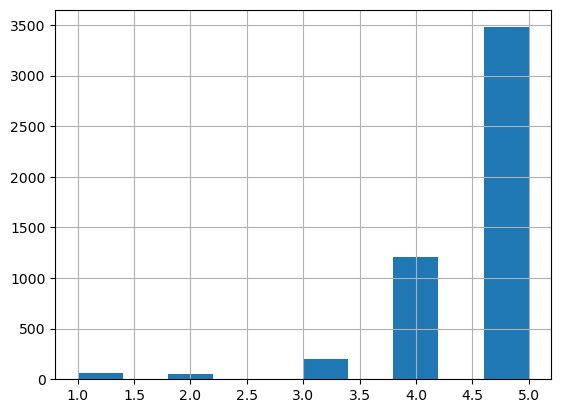

In [9]:
#visualizing the star rating column
df['reviews.rating'].hist()

In [10]:
df.head()

id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   
3  https://pisces.bbystatic.com/image2/BestBuy_US...   
4  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend...  ...   
1  allnewkindleereaderblack6glarefreetouchscreend...  ...   
2  allnewkindleereaderblack6glarefreetouchscreend...  ...   
3  allnewkindleereaderblack6glarefreetouchscreend...  ...   
4  allnewkindleereaderblack6glarefreetouchscreend...  ...   

                                    reviews.dateSeen reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...               False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                True   
2                               2018-05-27T00:00:00Z                True   
3                               2018-10-09T00:00:00Z                True   
4                               2018-05-27T00:00:00Z                True   

    reviews.id reviews.numHelpful reviews.rating  \
0          NaN                  0              3   
1          NaN                  0              5   
2          NaN                  0              4   
3  177283626.0                  3              5   
4          NaN                  0              5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title  reviews.username  \
0                                     Too small            llyyue   
1  Great light reader. Easy to use at the beach            Charmi   
2                           Great for the price      johnnyjojojo   
3                                   A Great Buy           Kdperry   
4      Solid entry-level Kindle. Great for kids       Johnnyblack   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newe

In [11]:
df.isna().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

## 3.2)since we have small number of null values we decided to omit the null values

In [12]:
# #missing values dropping
# df.dropna(subset=['reviews.dateAdded', 'reviews.id', 'reviews.title'], inplace=True, axis=0)
# viz_df.dropna(subset=['reviews.dateAdded', 'reviews.id','reviews.title'], inplace=True, axis=0)

In [13]:
df.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

## 3.3)Merging the review_headline and review_body as the full_review


In [14]:
#merging the review_headline and review_body as the full_review. the reason for
#this is as both column will have insight for the model
df["full_review"] = df["reviews.text"]+" " +df["reviews.title"]

In [15]:
#viewing full reviews column
df['full_review']

0       I thought it would be as big as small paper bu...
1       This kindle is light and easy to use especiall...
2       Didnt know how much i'd use a kindle so went f...
3       I am 100 happy with my purchase. I caught it o...
4       Solid entry level Kindle. Great for kids. Gift...
                              ...                        
4995    This is a great tablet for the price. Amazon i...
4996    This tablet is the perfect size and so easy to...
4997    Purchased this for my son. Has room to upgrade...
4998    I had some thoughts about getting this for a 5...
4999    this is a steal, have 8 gb model as well.This ...
Name: full_review, Length: 5000, dtype: object

In [16]:
df.shape

(5000, 25)

## 3.4) Visualizing the distribution with date and min review label

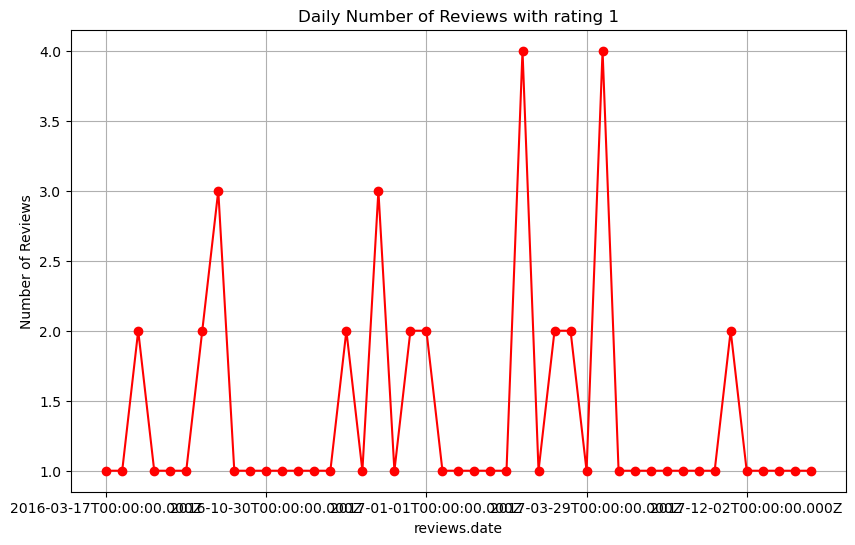

In [17]:
df_1 = df[df['reviews.rating'] == 1]
# df.head()

# Group by date and count the number of reviews for each day
daily_count = df_1.groupby('reviews.date').size()

# Plot the daily count
plt.figure(figsize=(10, 6))
daily_count.plot(kind='line', marker='o', linestyle='-', color='r')
plt.title('Daily Number of Reviews with rating 1')
plt.xlabel('reviews.date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


## 3.5) Subsetting the whole dataset 

In [18]:
#creating new dataframe with star rating and full review data
df = df[['reviews.rating','full_review','primaryCategories']]

In [19]:
df.head()

reviews.rating                                        full_review  \
0               3  I thought it would be as big as small paper bu...   
1               5  This kindle is light and easy to use especiall...   
2               4  Didnt know how much i'd use a kindle so went f...   
3               5  I am 100 happy with my purchase. I caught it o...   
4               5  Solid entry level Kindle. Great for kids. Gift...   

  primaryCategories  
0       Electronics  
1       Electronics  
2       Electronics  
3       Electronics  
4       Electronics

## 3.6)Setting up label column for training and testing purposes

In [20]:
#creating a review label column
def label_review(df):
    df['review_label'] = df['reviews.rating'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Call the function with your DataFrame 'df'
df = label_review(df)

# Call the function with your DataFrame 'df'
viz_df = label_review(viz_df)

In [21]:
df.head(10)

reviews.rating                                        full_review  \
0               3  I thought it would be as big as small paper bu...   
1               5  This kindle is light and easy to use especiall...   
2               4  Didnt know how much i'd use a kindle so went f...   
3               5  I am 100 happy with my purchase. I caught it o...   
4               5  Solid entry level Kindle. Great for kids. Gift...   
5               5  This make an excellent ebook reader. Don't exp...   
6               5  I ordered this for my daughter, as I have the ...   
7               4  I bought my Kindle about 2 months ago and the ...   
8               5  amazon kindle is always the best ebook, upgrad...   
9               5  It's beyond my expectation, and it can even sh...   

  primaryCategories  review_label  
0       Electronics             0  
1       Electronics             1  
2       Electronics             1  
3       Electronics             1  
4       Electronics             1  
5       Electronics             1  
6       Electronics             1  
7       Electronics             1  
8       Electronics             1  
9       Electronics             1

In [22]:
#dropping the star rating column
df = df.drop('reviews.rating',axis = 1)

## 3.7)Final Data frame before text preprocessing 

In [23]:
df.head()
df[df['review_label'] == 0]

full_review primaryCategories  \
0     I thought it would be as big as small paper bu...       Electronics   
15    It does its job but I would buy one which the ...       Electronics   
20    I was looking for a kindle whitepaper. I saw o...       Electronics   
51    The kindle is good to download apps for books ...       Electronics   
70    Looking at the picture and seeing it was 8th g...       Electronics   
...                                                 ...               ...   
4904  The battery is having more and more trouble ho...       Electronics   
4945  My daughter has had this tablet for almost 2 m...       Electronics   
4953  Very cheap and was not impressed at all never ...       Electronics   
4971  Hard to use, Lots of ads, and Randomly closes ...       Electronics   
4975  I wish it has some more of the apps from the p...       Electronics   

      review_label  
0                0  
15               0  
20               0  
51               0  
70               0  
...            ...  
4904             0  
4945             0  
4953             0  
4971             0  
4975             0  

[314 rows x 3 columns]

In [24]:
df.head()

full_review primaryCategories  \
0  I thought it would be as big as small paper bu...       Electronics   
1  This kindle is light and easy to use especiall...       Electronics   
2  Didnt know how much i'd use a kindle so went f...       Electronics   
3  I am 100 happy with my purchase. I caught it o...       Electronics   
4  Solid entry level Kindle. Great for kids. Gift...       Electronics   

   review_label  
0             0  
1             1  
2             1  
3             1  
4             1

In [25]:
df.shape

(5000, 3)

In [26]:
viz_df.shape

(5000, 25)

# 4)Text pre-processing

## 4.1)Removing tokenizing, removing stop words, stemming 

In [27]:
!pip install spacy

DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/pandas_profiling-3.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/joblib-1.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/fonttools-4.50.0-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users

In [28]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["tagger", "ner", "parser"])

In [29]:
#stopword setup with custom stop words
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
#added some more custom words as this has direct influence to the model and with more core relation possibility
#for the model to overfit will have high chance
custom_stopwords_nltk = set(nltk_stopwords.words('english'))
custom_stopwords_nltk.update(['one', 'two', 'three', 'four', 'five', 'stars'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravindadharmalingam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Custom list of stopwords for Spacy
custom_stopwords_spacy = set(nltk_stopwords.words('english'))  # Spacy uses NLTK's list by default
custom_stopwords_spacy.update(['one', 'two', 'three', 'four', 'five', 'stars'])

In [31]:
# NLTK Stemming and Lemmatization
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aravindadharmalingam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
corpus_nltk_stem_lemma = []
corpus_word_nltk_stem_lemma = []
l = len(df)

for i in range(l):
    try:
        review = re.sub('[^a-zA-Z]', ' ', df['full_review'][i])
    except:
        print(i)
        print("regex")
    review = review.lower()
    review = review.split()
    print(review)
    review = [lemmatizer.lemmatize(ps.stem(word)) for word in review if not word in custom_stopwords_nltk]
    corpus_word_nltk_stem_lemma.append(review)
    review = ' '.join(review)
    corpus_nltk_stem_lemma.append(review)

['i', 'thought', 'it', 'would', 'be', 'as', 'big', 'as', 'small', 'paper', 'but', 'turn', 'out', 'to', 'be', 'just', 'like', 'my', 'palm', 'i', 'think', 'it', 'is', 'too', 'small', 'to', 'read', 'on', 'it', 'not', 'very', 'comfortable', 'as', 'regular', 'kindle', 'would', 'definitely', 'recommend', 'a', 'paperwhite', 'instead', 'too', 'small']
['this', 'kindle', 'is', 'light', 'and', 'easy', 'to', 'use', 'especially', 'at', 'the', 'beach', 'great', 'light', 'reader', 'easy', 'to', 'use', 'at', 'the', 'beach']
['didnt', 'know', 'how', 'much', 'i', 'd', 'use', 'a', 'kindle', 'so', 'went', 'for', 'the', 'lower', 'end', 'im', 'happy', 'with', 'it', 'even', 'if', 'its', 'a', 'little', 'dark', 'great', 'for', 'the', 'price']
['i', 'am', 'happy', 'with', 'my', 'purchase', 'i', 'caught', 'it', 'on', 'sale', 'at', 'a', 'really', 'good', 'price', 'i', 'am', 'normally', 'a', 'real', 'book', 'person', 'but', 'i', 'have', 'a', 'year', 'old', 'who', 'loves', 'ripping', 'up', 'pages', 'the', 'kindle'

In [34]:
# Spacy Stemming and Lemmatization
corpus_spacy_stem_lemma = []

for i in range(l):
    try:
        review = re.sub('[^a-zA-Z]', ' ', df['full_review'][i])
    except:
        print("regex")
    review = review.lower()
    doc = nlp(review)
    
    # Spacy Stemming and Lemmatization
    review_spacy_stem_lemma = ' '.join([token.lemma_ for token in doc if token.text.lower() not in custom_stopwords_spacy])
    corpus_spacy_stem_lemma.append(review_spacy_stem_lemma)


/Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


regex
regex
regex
regex
regex
regex
regex
regex
regex
regex
regex
regex
regex


## 4.2) Corpus of words formed out of the review text

In [35]:
#first ten view of the nltk corpus
corpus_nltk_stem_lemma[:10]

['thought would big small paper turn like palm think small read comfort regular kindl would definit recommend paperwhit instead small',
 'kindl light easi use especi beach great light reader easi use beach',
 'didnt know much use kindl went lower end im happi even littl dark great price',
 'happi purchas caught sale realli good price normal real book person year old love rip page kindl prevent extrem portabl fit better purs giant book load lot book finish start anoth without go store serv need pick paperwhit price unbeat differ could see backlit simpl book light dollar tree solv issu second kindl first old keyboard model put fell love keyboard lol like last great buy',
 'solid entri level kindl great kid gift kid friend love use read ipad batteri good higher model bit better solid entri level kindl great kid',
 'make excel ebook reader expect much devic except read basic ebook good thing cheap good read sun good ebook',
 'order daughter black paperwhit love read quit bit larger book dr

In [36]:
corpus_nltk_stem_lemma[0]

'thought would big small paper turn like palm think small read comfort regular kindl would definit recommend paperwhit instead small'

In [37]:
corpus_spacy_stem_lemma[:10]

['thought would big small paper turn like palm   think small read     comfortable regular kindle   would definitely recommend paperwhite instead   small',
 'kindle light easy use especially beach     great light reader   easy use beach',
 'nt know much use kindle went lower end   happy   even little dark great price',
 '     happy purchase   caught sale really good price   normally real book person      year old loves ripping pages   kindle prevents   extremely portable   fits better purse giant book    loaded lots books   finish start another   without go store   serves needs   picked paperwhite price unbeatable difference could see backlit   simple book light dollar tree solves issue   second kindle   first old keyboard model   put fell love keyboard   lol   likely last   great buy',
 'solid entry level kindle   great kids   gifted kid friend love use read ipads   battery good higher model bit better   solid entry level kindle   great kids',
 'make excellent ebook reader   expect muc

## 4.3)Displaying the frequency distribution of words in the corpus

In [38]:
# Displaying the frequency distribution of words in the NLTK corpus after stemming and lemmatization
frequency_distribution_nltk_stem_lemma = FreqDist(corpus_nltk_stem_lemma)

print(frequency_distribution_nltk_stem_lemma)

frequency_distribution_nltk_stem_lemma.most_common(20)


<FreqDist with 4385 samples and 5000 outcomes>


[('gave grandkid age christma love great kid', 4),
 ('bought mostli backup read book sinc larger cell phone back use occasion may hour use till week sent laptop repair probabl use tot week watch rd primetim video week simpli turn turn use power trick safe mode gone toast bought octob quit februari old fire last year use stereo speaker last week charg day sturdier built full junk offer app constantli tri add junk junk junk le day use toast',
  4),
 ('bought kindl yr old granddaught christma husband kindl sever year prior year old grandson love watch play child kind game system use kindl way yr old grandson still play mine love watch tube video play game sever game system xbox sega d still use kindl time system husband use time everyth internet watch movi show get readi buy grandson new kindl mine bit older crack screen still work good would like call look gb gb realli durabl tough great',
  4),
 ('got daughter law love exactli need great tablet', 4),
 ('christma present person receiv ha

In [39]:
# Displaying the frequency distribution of words in the Spacy corpus after stemming and lemmatization
frequency_distribution_spacy_stem_lema = FreqDist(corpus_spacy_stem_lemma)

print(frequency_distribution_spacy_stem_lema)


frequency_distribution_spacy_stem_lema.most_common(20)


<FreqDist with 4383 samples and 5000 outcomes>


[('bought mostly backup read books   since larger cell phone back   used occasionally may         hours use till week sent laptop repairs   probably used tot week   watching   rd primetime video week simply turned   turn using power trick safe mode   gone   toast   bought october             quit february           old fire lasted       years use   stereo speakers   lasted week charge       days sturdier built   full junk   offered apps   constantly trying add   junk junk junk less      days        use   toast',
  4),
 ('bought kindle    yr old granddaughter christmas   husband kindles several years prior      year old grandson love watching playing   children kinds game systems use kindle way      yr old grandson still plays mine loves watching tube   videos playing games   several game systems   xbox   sega   ds still uses kindle time systems husband used time everything internet watching movies shows   getting ready buy grandson new kindle   mine bit older cracked screen still works

In [40]:
# Convert NLTK frequency distribution to a DataFrame for Seaborn
df_nltk = pd.DataFrame(list(frequency_distribution_nltk_stem_lemma.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Convert Spacy frequency distribution to a DataFrame for Seaborn
df_spacy = pd.DataFrame(list(frequency_distribution_spacy_stem_lema.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

/var/folders/tw/6lg866qn3zx323xyz7m36gw00000gn/T/ipykernel_3058/422002153.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


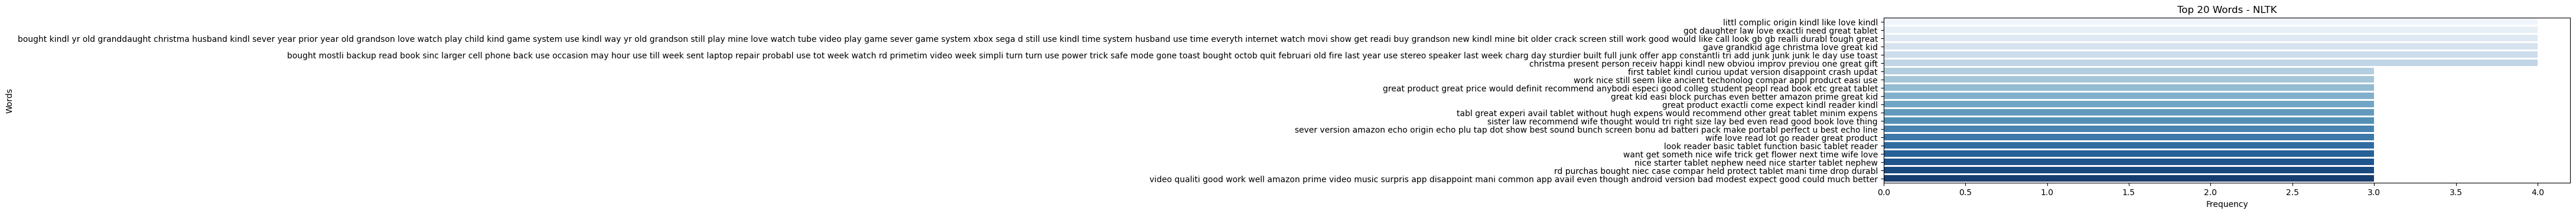

In [41]:
# Plotting horizontal bar plots using Seaborn
plt.figure(figsize=(15, 8))

# NLTK
plt.subplot(2, 1, 1)
sns.barplot(x='Frequency', y='Word', data=df_nltk, palette='Blues')
plt.title('Top 20 Words - NLTK')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

/var/folders/tw/6lg866qn3zx323xyz7m36gw00000gn/T/ipykernel_3058/2324306583.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


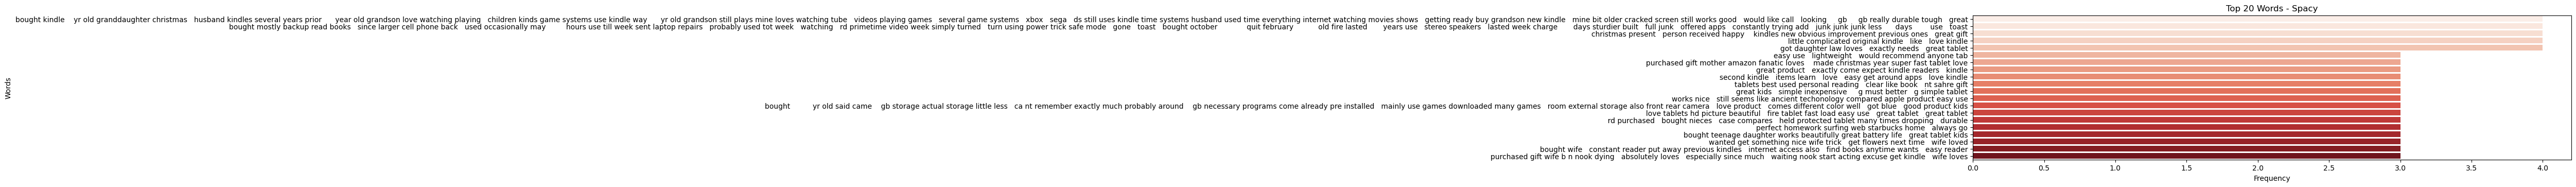

In [42]:
# Spacy
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 2)
sns.barplot(x='Frequency', y='Word', data=df_spacy, palette='Reds')
plt.title('Top 20 Words - Spacy')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

##### Displaying the Most Frequancy word in the line graph to identify the insight

In [43]:
x =[]
y =[]
for i in frequency_distribution_nltk_stem_lemma.most_common(20):
    y.append(i[0])
    x.append(i[1])

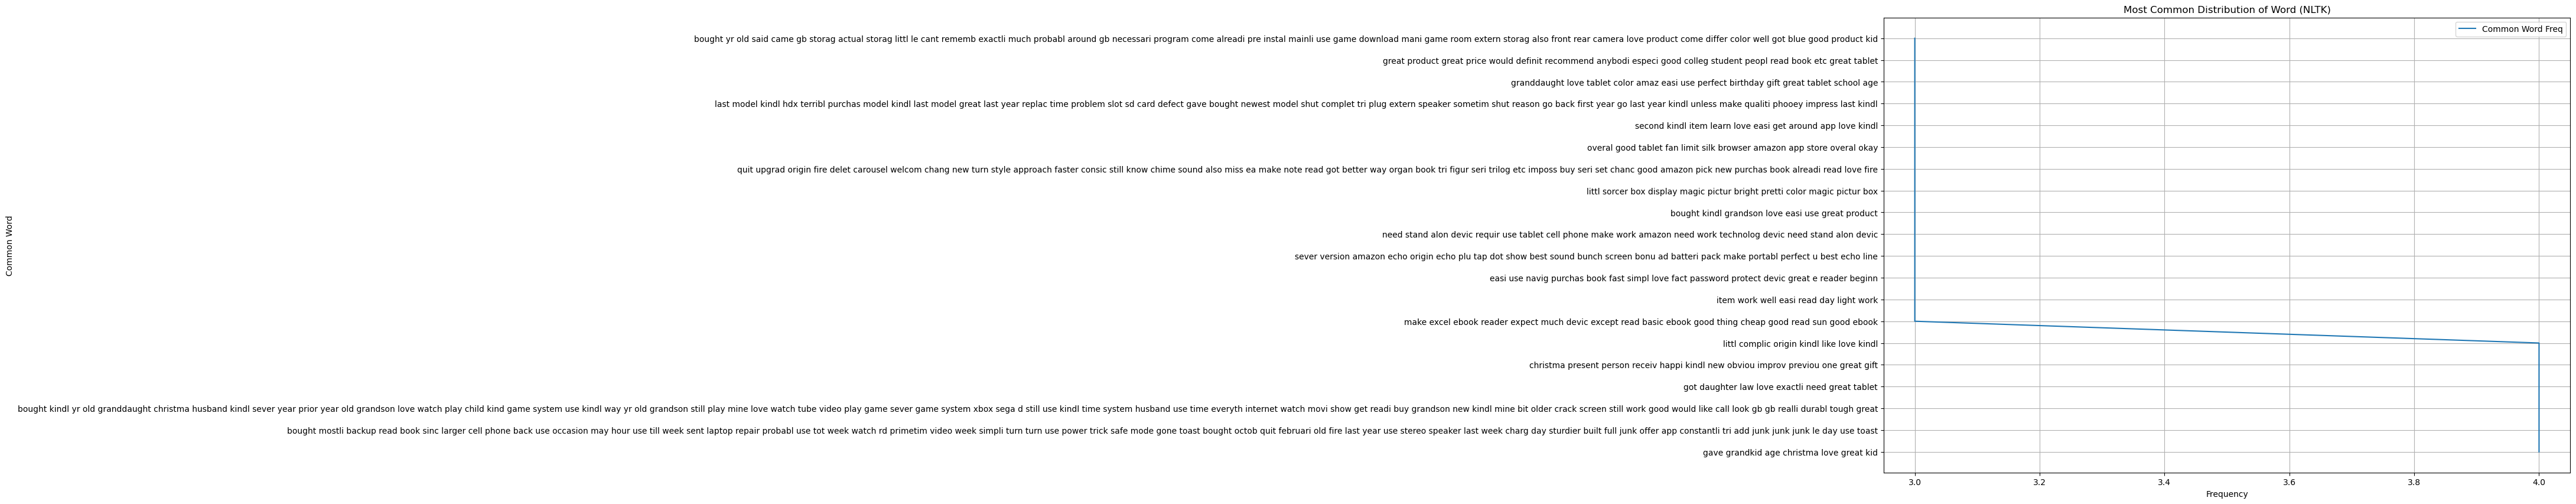

In [44]:
#plotting most common distribution of the word
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(x,y,label='Common Word Freq')
plt.title('Most Common Distribution of Word (NLTK)')
plt.xlabel('Frequency')
plt.ylabel('Common Word')
plt.legend()
plt.savefig('Frequency Distribution of Common Word using NLTK')

In [45]:
a =[]
b =[]
for i in frequency_distribution_spacy_stem_lema.most_common(20):
    b.append(i[0])
    a.append(i[1])

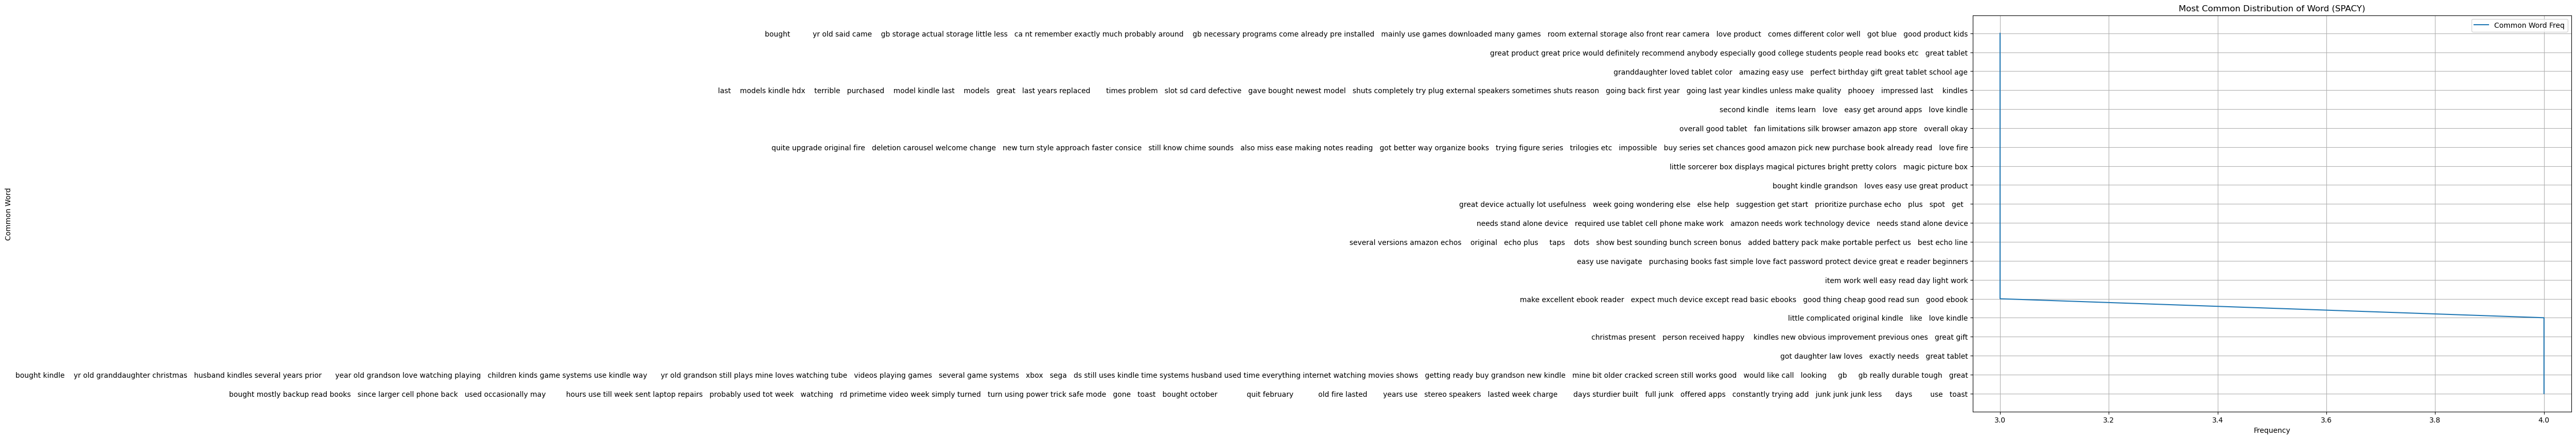

In [46]:
#plotting most common distribution of the word
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(a,b,label='Common Word Freq')
plt.title('Most Common Distribution of Word (SPACY)')
plt.xlabel('Frequency')
plt.ylabel('Common Word')
plt.legend()
plt.savefig('Frequency Distribution of Common Word using Spacy')

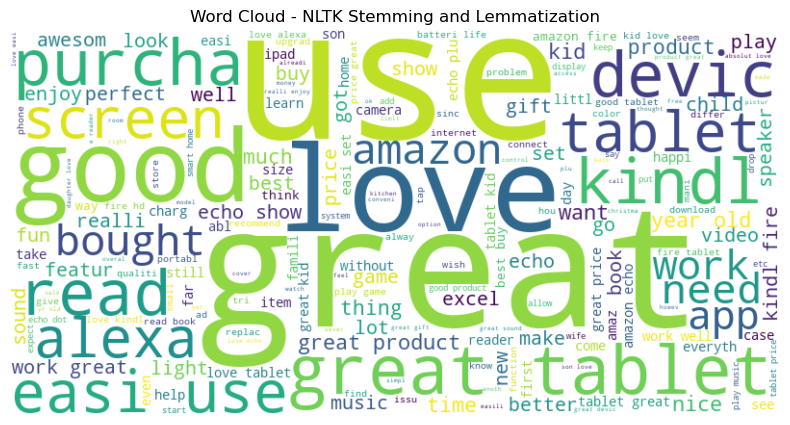

In [47]:
wordcloud_nltk = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus_nltk_stem_lemma))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nltk, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - NLTK Stemming and Lemmatization')
plt.show()

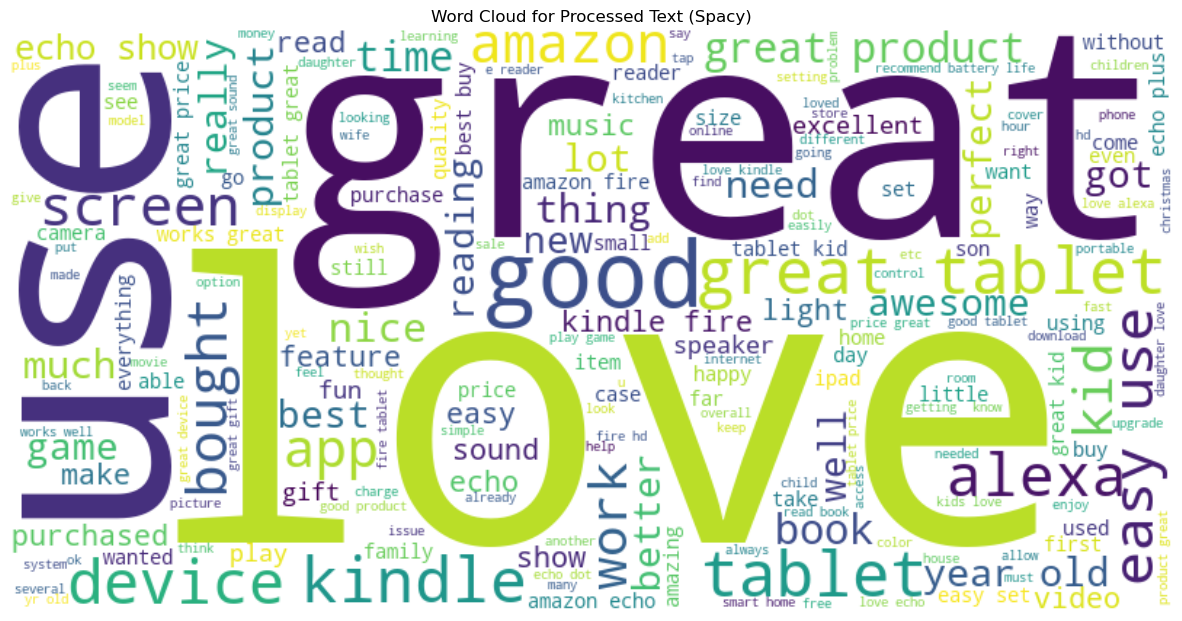

In [48]:

# Combine the processed text into a single string
processed_text_spacy = ' '.join(corpus_spacy_stem_lemma)

# Generate the word cloud
wordcloud_spacy = WordCloud(width=800, height=400, background_color='white').generate(processed_text_spacy)

# Plot the word cloud using Seaborn
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_spacy, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Processed Text (Spacy)')
plt.show()

## 4.4)Deriving target variable

In [49]:
# Mapping 0 and 1 to positive and negative labels
df['review_category'] = df['review_label'].map({0: 'negative', 1: 'positive'})
df 

# Mapping 0 and 1 to positive and negative labels
viz_df['review_category'] = viz_df['review_label'].map({0: 'negative', 1: 'positive'})


In [50]:
df.head()

full_review primaryCategories  \
0  I thought it would be as big as small paper bu...       Electronics   
1  This kindle is light and easy to use especiall...       Electronics   
2  Didnt know how much i'd use a kindle so went f...       Electronics   
3  I am 100 happy with my purchase. I caught it o...       Electronics   
4  Solid entry level Kindle. Great for kids. Gift...       Electronics   

   review_label review_category  
0             0        negative  
1             1        positive  
2             1        positive  
3             1        positive  
4             1        positive

# 5)Visualizing Word Clouds how vectorizers give importances to words

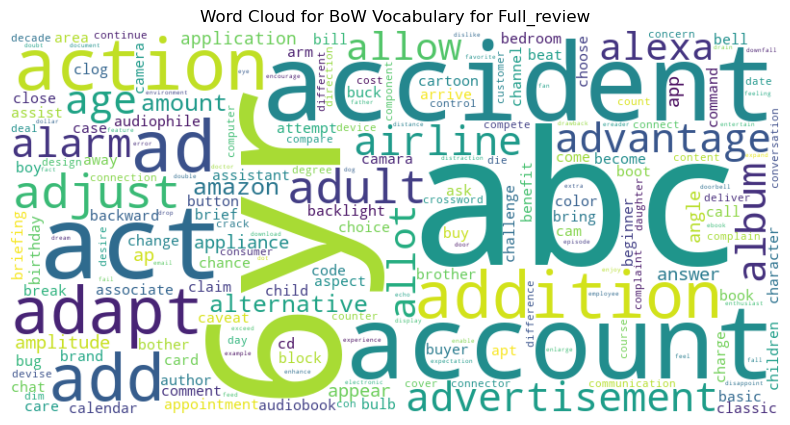

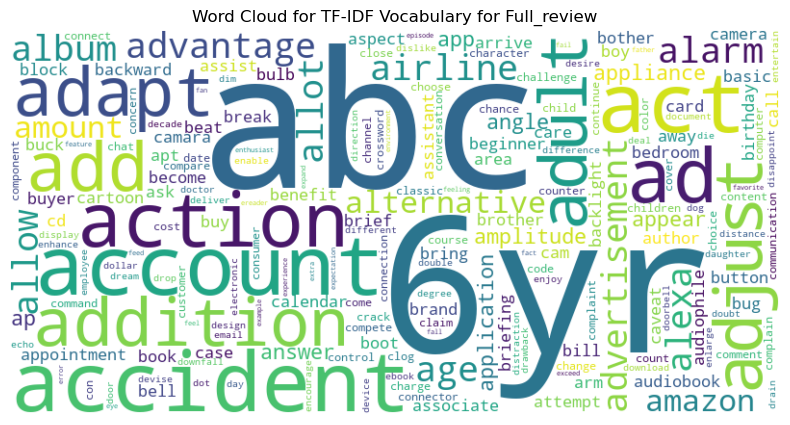

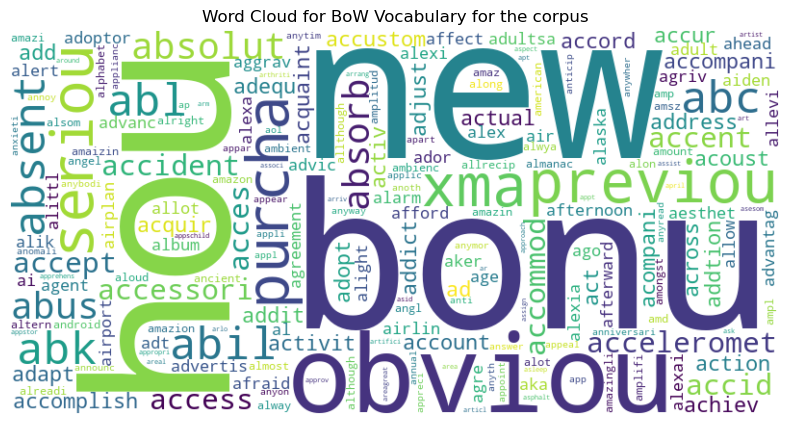

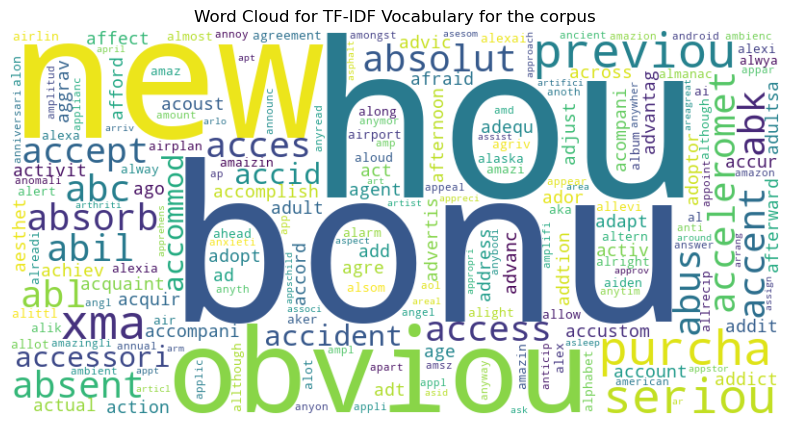

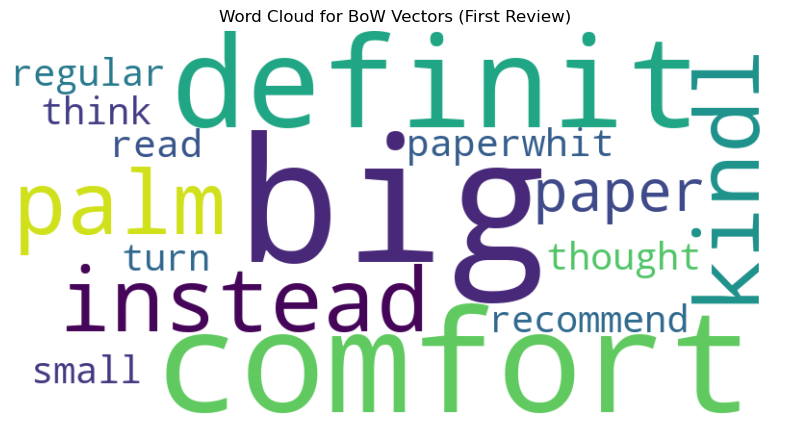

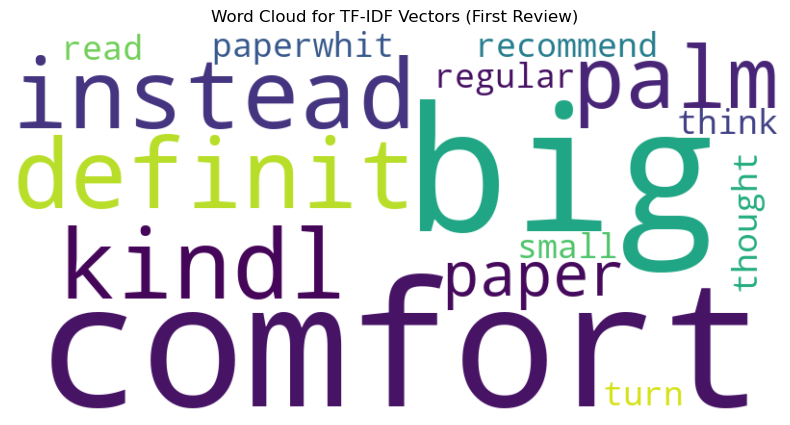

In [51]:

# Bag of Words (BoW) Vectorizer for the full_review
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(df['full_review'].values.astype('U'))
bow_feature_names_review = bow_vectorizer.get_feature_names_out()

# TF-IDF Vectorizer for the full_review
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['full_review'].values.astype('U'))
tfidf_feature_names_review = tfidf_vectorizer.get_feature_names_out()

# Word Clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# Word Cloud for BoW vocabulary for the full review
plot_word_cloud(' '.join(bow_feature_names_review), 'Word Cloud for BoW Vocabulary for Full_review')

# Word Cloud for TF-IDF vocabulary for the for Full_review
plot_word_cloud(' '.join(tfidf_feature_names_review), 'Word Cloud for TF-IDF Vocabulary for Full_review')

first_review = df['full_review'].iloc[0]

# Bag of Words (BoW) Vectorizer for the corpus
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(corpus_nltk_stem_lemma)
bow_feature_names = bow_vectorizer.get_feature_names_out()

# TF-IDF Vectorizer for the corpus
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus_nltk_stem_lemma)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Word Cloud for BoW vocabulary for the corpus
plot_word_cloud(' '.join(bow_feature_names), 'Word Cloud for BoW Vocabulary for the corpus')

# Word Cloud for TF-IDF vocabulary for the corpus
plot_word_cloud(' '.join(tfidf_feature_names), 'Word Cloud for TF-IDF Vocabulary for the corpus')


# Word Cloud for BoW vectors of the first review
plot_word_cloud(' '.join([word for word in bow_feature_names if bow_vectors[0, bow_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for BoW Vectors (First Review)')

# Word Cloud for TF-IDF vectors of the first review
plot_word_cloud(' '.join([word for word in tfidf_feature_names if tfidf_vectors[0, tfidf_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for TF-IDF Vectors (First Review)')

# 6) Modeling 

## 6.1) Implementation of Vectorization and Models

### 6.1.1) Implementing Bag of Words Vectorization and Using Random Forest model

Model: Vectorization: Bag of Word<br> Classifier Model: Random Forest

Accuracy: 0.954

Classification Report of Vectorization BoW & Random Forest:
              precision    recall  f1-score   support

    negative       0.87      0.32      0.47        63
    positive       0.96      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.91      0.66      0.72      1000
weighted avg       0.95      0.95      0.94      1000

Confustion Matrix
 [[ 20  43]
 [  3 934]]


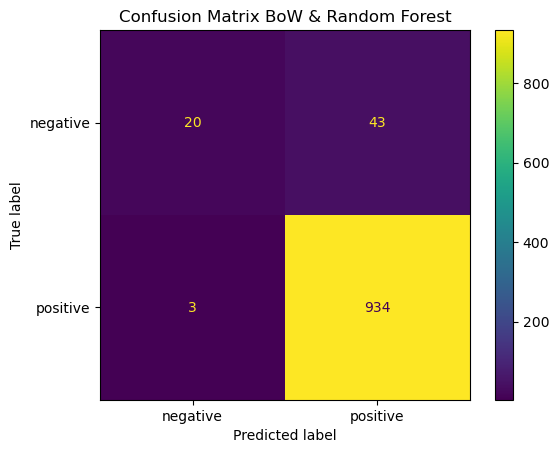

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

data = l

X= corpus_nltk_stem_lemma #df['full_review']
y = df['review_category']

#spliting of dataset size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report of Vectorization BoW & Random Forest:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix BoW & Random Forest')
plt.show()

### 6.1.2) Implementing Bag of Words Vectorization and Using Naive Bayes model

 Model: Vectorization: BOW<br> Classifier Model: Naive Bayes

Accuracy: 0.952

Classification Report of Vecotrization BoW & Naive Bayes:
              precision    recall  f1-score   support

    negative       0.83      0.30      0.44        63
    positive       0.95      1.00      0.97       937

    accuracy                           0.95      1000
   macro avg       0.89      0.65      0.71      1000
weighted avg       0.95      0.95      0.94      1000

Confustion Matrix
 [[ 19  44]
 [  4 933]]


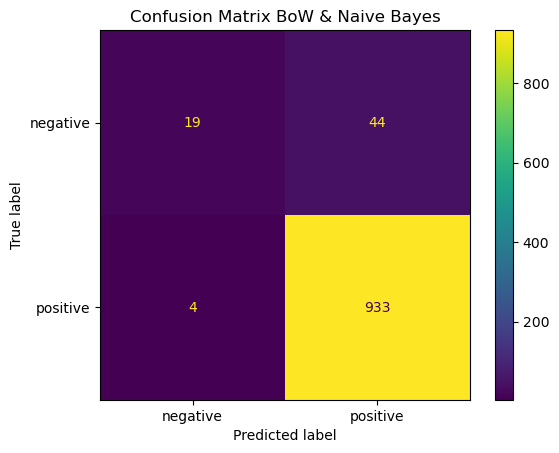

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus_nltk_stem_lemma #df['full_review']
y = df['review_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report of Vecotrization BoW & Naive Bayes:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix BoW & Naive Bayes')
plt.show()

In [54]:
classifier.feature_count_

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 3., 44.,  1., ...,  2.,  0.,  1.]])

### 6.1.3) Implementing Bag of TFid Vectorization and Using Random Forest model

Model : Vectorization: tf-idf<br> Classifier Model: Random Forest

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus_nltk_stem_lemma  #df['full_review']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [66]:
X_train_vectorized.shape

(4000, 700)

In [67]:
vectorizer.get_feature_names_out()

array(['abil', 'abl', 'absolut', 'access', 'account', 'activ', 'actual',
       'ad', 'adapt', 'add', 'addit', 'adjust', 'adult', 'advertis',
       'afford', 'age', 'ago', 'alarm', 'alexa', 'allow', 'almost',
       'along', 'alreadi', 'also', 'altern', 'although', 'alway', 'amaz',
       'amazon', 'amount', 'android', 'annoy', 'anoth', 'answer', 'anyon',
       'anyth', 'anywher', 'app', 'appear', 'appl', 'applic', 'appropri',
       'area', 'arlo', 'around', 'ask', 'assist', 'audibl', 'audio',
       'autom', 'automat', 'avail', 'avid', 'away', 'awesom', 'back',
       'bad', 'bag', 'base', 'basic', 'batteri', 'beat', 'beauti', 'bed',
       'bedroom', 'beginn', 'believ', 'best', 'better', 'big', 'bigger',
       'biggest', 'birthday', 'bit', 'black', 'blue', 'bluetooth', 'book',
       'bought', 'box', 'boy', 'brand', 'break', 'brief', 'bright',
       'bring', 'brother', 'brow', 'browser', 'buck', 'budget', 'built',
       'bulb', 'busi', 'button', 'buy', 'call', 'cam', 'came', 'c

Accuracy: 0.955

Classification Report of Vecotrization TF-IDF & Random Forest:
              precision    recall  f1-score   support

    negative       0.88      0.33      0.48        63
    positive       0.96      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.92      0.67      0.73      1000
weighted avg       0.95      0.95      0.95      1000

Confustion Matrix
 [[ 21  42]
 [  3 934]]


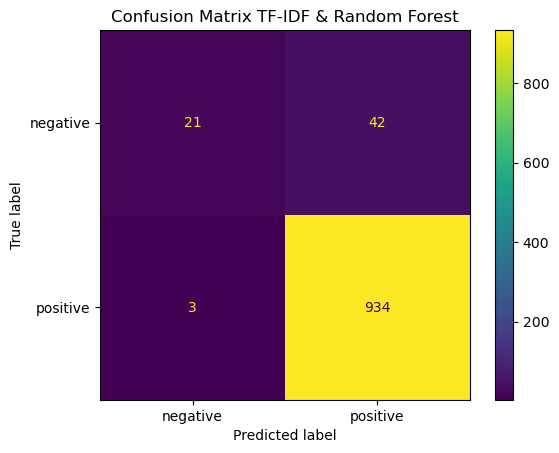

In [80]:
classifier = RandomForestClassifier()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report of Vecotrization TF-IDF & Random Forest:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix TF-IDF & Random Forest')
plt.show()

### 6.1.4)Implementing Bag of TFid Vectorization and Using Naive Bayes model

Model: Vectorization: tf-idf<br> Classifier Model: Naive Bayes

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus_nltk_stem_lemma   #df['full_review']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)


X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [71]:
X_train_vectorized.shape

(4000, 700)

#### Deriving the vocabulary used for building vectors

In [72]:
vectorizer.get_feature_names_out()

array(['abil', 'abl', 'absolut', 'access', 'account', 'activ', 'actual',
       'ad', 'adapt', 'add', 'addit', 'adjust', 'adult', 'advertis',
       'afford', 'age', 'ago', 'alarm', 'alexa', 'allow', 'almost',
       'along', 'alreadi', 'also', 'altern', 'although', 'alway', 'amaz',
       'amazon', 'amount', 'android', 'annoy', 'anoth', 'answer', 'anyon',
       'anyth', 'anywher', 'app', 'appear', 'appl', 'applic', 'appropri',
       'area', 'arlo', 'around', 'ask', 'assist', 'audibl', 'audio',
       'autom', 'automat', 'avail', 'avid', 'away', 'awesom', 'back',
       'bad', 'bag', 'base', 'basic', 'batteri', 'beat', 'beauti', 'bed',
       'bedroom', 'beginn', 'believ', 'best', 'better', 'big', 'bigger',
       'biggest', 'birthday', 'bit', 'black', 'blue', 'bluetooth', 'book',
       'bought', 'box', 'boy', 'brand', 'break', 'brief', 'bright',
       'bring', 'brother', 'brow', 'browser', 'buck', 'budget', 'built',
       'bulb', 'busi', 'button', 'buy', 'call', 'cam', 'came', 'c

Accuracy: 0.952

Classification Report of Vecotrization TF-IDF & Naive Bayes:
              precision    recall  f1-score   support

    negative       0.83      0.30      0.44        63
    positive       0.95      1.00      0.97       937

    accuracy                           0.95      1000
   macro avg       0.89      0.65      0.71      1000
weighted avg       0.95      0.95      0.94      1000

Confustion Matrix
 [[ 19  44]
 [  4 933]]


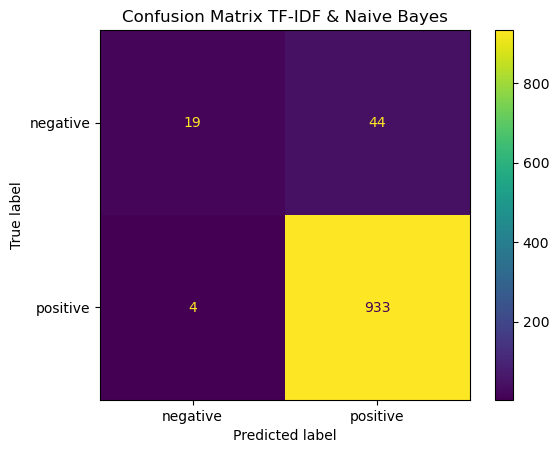

In [81]:
classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report of Vecotrization TF-IDF & Naive Bayes:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix TF-IDF & Naive Bayes')
plt.show()